# The smooth function minimization

The function  f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) on [1, 30] is smooth.

In [9]:
from scipy import optimize as opt
from matplotlib import pylab as plb
import numpy as np

In [10]:
%matplotlib inline

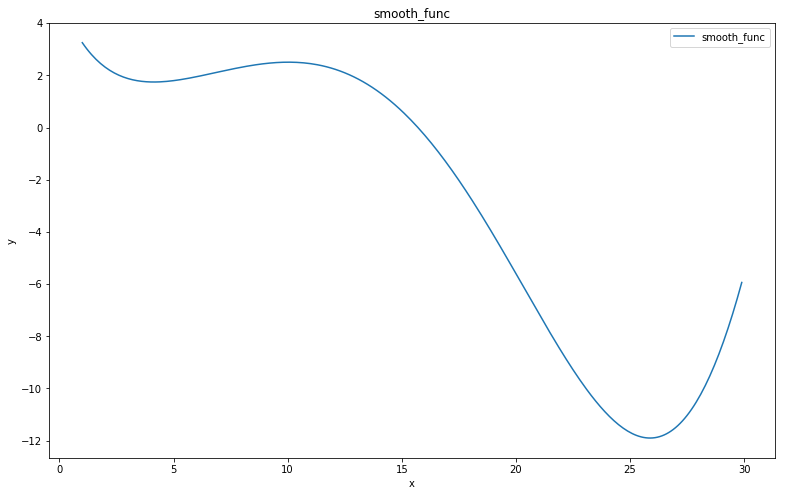

In [44]:
def smooth_func(x):
    return np.sin(x/5.) * np.exp(x/10.) + 5. * np.exp(-x/2.)

x = np.arange(1,30,0.1)
y = smooth_func(x)

plb.figure(figsize=(13,8))
plb.plot(x, y, label="smooth_func")
plb.xlabel("x")
plb.ylabel("y")
plb.legend()
plb.title("smooth_func")
plb.show()

In [22]:
# Standart (non-arg) minimize function by default
for x in range(1,31):
    print(f"Initial guess = {x}\n{opt.minimize(smooth_func, [x])}", end="\n\n")


Initial guess = 1
      fun: 1.745268290332218
 hess_inv: array([[6.01541998]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.13628697])

Initial guess = 2
      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

Initial guess = 3
      fun: 1.7452682905857713
 hess_inv: array([[5.94248075]])
      jac: array([-9.16421413e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.13623333])

Initial guess = 4
      fun: 1.7452682904133416
 hess_inv: array([[5.93460225]])
      jac: array([-5.1856041e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4


In [23]:
# BFGS method
for x in range (1,31):
    print(f"Initial guess = {x}\n{opt.minimize(smooth_func, [x], method='BFGS')}", end="\n\n")

Initial guess = 1
      fun: 1.745268290332218
 hess_inv: array([[6.01541998]])
      jac: array([-2.68220901e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.13628697])

Initial guess = 2
      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

Initial guess = 3
      fun: 1.7452682905857713
 hess_inv: array([[5.94248075]])
      jac: array([-9.16421413e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([4.13623333])

Initial guess = 4
      fun: 1.7452682904133416
 hess_inv: array([[5.93460225]])
      jac: array([-5.1856041e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4


The minimize function without method-argument work as "BFGS" method.

Where x=2 we have min = 1.74 and where x=30 we have y = -11.9 because BFGS method doesn't solve local extremum problem.

In [40]:
# The Differential evolution method:
print(opt.differential_evolution(smooth_func, [(1,30)]))

     fun: array([-11.89889467])
     jac: array([3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019354])


## Conclusion
The DE method has much more operation per iteration, but it solve the problem of sticking in the local extremum.

# The non-smooth function minimization

In [51]:
def non_smooth_func(x):
    return np.array([int(y) for y in smooth_func(x)])

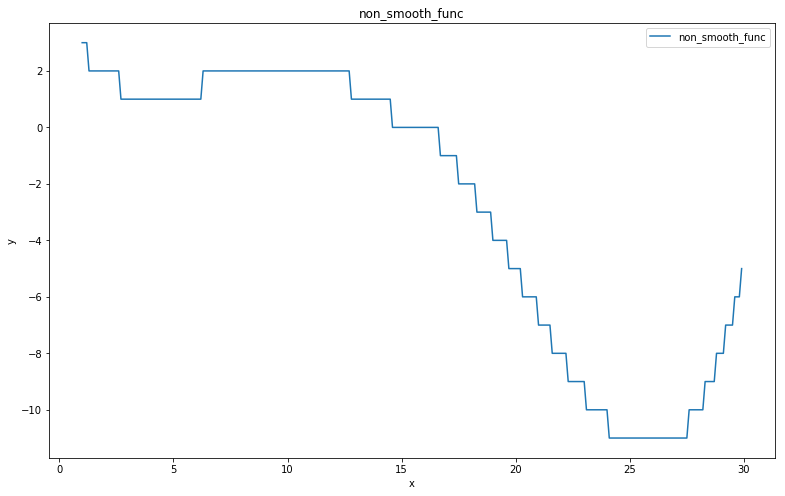

In [52]:
x = np.arange(1,30,0.1)
y = non_smooth_func(x)

plb.figure(figsize=(13,8))
plb.plot(x, y, label="non_smooth_func")
plb.xlabel("x")
plb.ylabel("y")
plb.legend()
plb.title("non_smooth_func")
plb.show()

In [53]:
# BFGS method
for z in range (1,31):
    print(f"Initial guess = {z}\n{opt.minimize(non_smooth_func, [z], method='BFGS')}", end="\n\n")

Initial guess = 1
      fun: array([3])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])

Initial guess = 2
      fun: array([2])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.])

Initial guess = 3
      fun: array([1])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([3.])

Initial guess = 4
      fun: array([1])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([4.])

Initial guess = 5
      fun: array([1])
 hess_inv: array([[1]])
      jac: array

In [54]:
# The Differential evolution method:
print(opt.differential_evolution(non_smooth_func, [(1,30)]))

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 182
     nit: 11
 success: True
       x: array([24.27219519])


## Conclusion
The gradient optimization method (BFGS) doesn't applicable to the non-smooth functions optimization. But DE method is suitable in this case very good.